In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')
sns.set_context('talk')

In [2]:
house = pd.read_csv('kc_house_data.csv')
house.head()

FileNotFoundError: [Errno 2] File kc_house_data.csv does not exist: 'kc_house_data.csv'

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [17]:
#Looking for correlation features to the target variable.

house_corr = house.corr().abs().unstack().sort_values(ascending=False).reset_index()
house_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation Coefficient"}, inplace=True)
price_corr = house_corr[house_corr['Feature 1'] == 'price']
price_corr.head()

,Feature 1,Feature 2,Correlation Coefficient
17,price,price,1.000000
37,price,sqft_living,0.702035
41,price,grade,0.667434
44,price,sqft_above,0.605567
47,price,sqft_living15,0.585379


### Univariate Linear Regression

In [10]:
# Turn feature and target variable to 1 column matrix
feature = house['sqft_living']
X = feature.values.reshape(-1,1)

target = house['price']
y = target.values.reshape(-1,1)

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (21613, 1)
Shape of y: (21613, 1)


In [11]:
# Split data into 70% training and 30% testing, then train and predict the effectiveness of
# the model on test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40) 

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(y_pred.shape)
print(X_train.shape)
print(y_train.shape)

(6484, 1)
(15129, 1)
(15129, 1)


In [18]:
#R square score for univariate linear regression model
score = reg.score(X_test, y_test)
print(f'R^2: {score}')

R^2: 0.5053104226540768


The feature variable can explain 50% of the variance in target variable.

In [13]:
#Mean squared error(MSE) for univariate linear regression
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(mse)

252181.25646613783


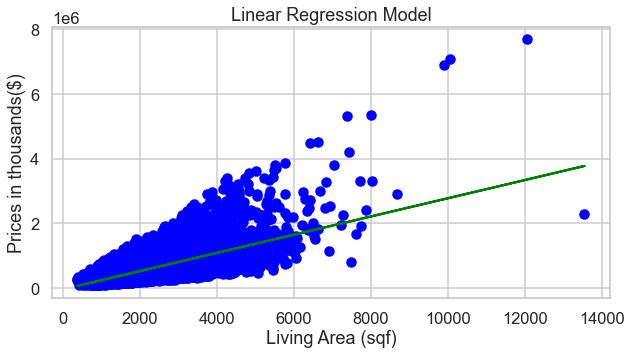

In [93]:
#Plot the Best fit line from the training data
plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train, color='b')
plt.plot(X_train, reg.predict(X_train), color='g')
plt.xlabel('Living Area (sqf)')
plt.ylabel('Prices in thousands($)')
plt.title('Linear Regression Model')
plt.show()

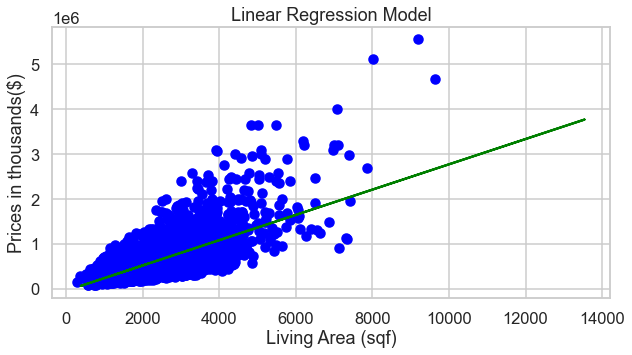

In [90]:
#Plot the Best fit line from training data on test data 
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='b')
plt.plot(X_train, reg.predict(X_train), color='g')
plt.xlabel('Living Area (sqf)')
plt.ylabel('Prices in thousands($)')
plt.title('Linear Regression Model')
plt.show()

In [21]:
#10-Fold Cross Validation 
cv_scores = cross_val_score(reg, X, y, cv=10)
print(cv_scores)
print('Average 10-Fold CV Scores: {}'.format(np.mean(cv_scores)))

[0.48319936 0.50185894 0.47088461 0.51367443 0.45344639 0.50121587
 0.5015115  0.48919046 0.49376918 0.48544901]
Average 10-Fold CV Scores: 0.4894199756705168


The R-square score shown 50% of variance in 'price' can be explained by 'sqft_living' features variable. However, the K-fold validation shown the actual accuracy of the model at 48.9%. 

In [45]:
# Use Lasso Regression Coefficients to identify the most important features to predict target variable
from sklearn.linear_model import Lasso
a = house.drop(['price', 'id', 'date'], axis=1).values
b = house['price'].values
print(a.shape)
print(b.shape)

(21613, 18)
(21613,)


In [55]:
lasso = Lasso(alpha=0.1, normalize=True)
lasso_coef = lasso.fit(a, b).coef_

D:\Ricky\envs\Python 38 and R\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27286864127997.75, tolerance: 291291676192.13
  model = cd_fast.enet_coordinate_descent(


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


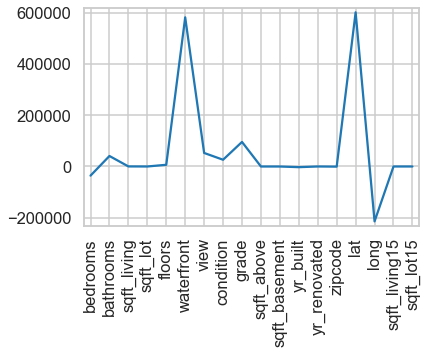

In [56]:
names = house.drop(['price', 'id', 'date'], axis=1).columns
print(names)
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=90)
plt.margins(0.02)
plt.show()

From the Lasso coefficients, the best feature variables are 'waterfront' & 'lat' to predicts the target variable. 

### Multivariate Linear Regression

In [68]:
# Use 17 Feature variables 
mX = house.drop(['id', 'date', 'price', 'zipcode'], axis=1)
mY = house['price'].values.reshape(-1,1)
print(X.shape)
print(y.shape)

(21613, 17)
(21613, 1)


In [85]:
X_train01, X_test01, y_train01, y_test01 = train_test_split(mX, mY, test_size=0.3, random_state=10)

reg_all = LinearRegression()

reg_all.fit(X_train01, y_train01)

y_pred01 = reg_all.predict(X_test01)

r_square = reg_all.score(X_test01, y_test01)
print(f'R Square Score: {r_square}')

R Square Score: 0.7044401528921909


This model can explains 70% of variance in the target variable

In [72]:
# MSE
error = np.sqrt(mean_squared_error(y_test01, y_pred01))
print(error)

201909.82222733652


In [73]:
# 10-Fold Cross Validation 
cross_validation = cross_val_score(reg_all, mX, mY , cv=10)
print(np.mean(cross_validation))

0.6908930054058259


The Multivariate Linear Regression model is better at predicting the target variable than the Univariate Linear Regression. Indeed, the scores were 70.4% to 48.9%. 

In [82]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train01, y_train01)
ridge_pred = ridge.predict(X_test01)
ridge.score(X_test01, y_test01)

0.6997252097723581

Ridge Regression increase bias to decrease variance. Meaning, it is great at predicting future data. In other words, it is more resistant to noise(underfit,overfit)  

In [84]:
# Lasso Regression
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train01, y_train01)
lasso_pred = lasso.predict(X_test01)
lasso.score(X_test01, y_test01)

D:\Ricky\envs\Python 38 and R\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63740159450240.875, tolerance: 201851112952.9469
  model = cd_fast.enet_coordinate_descent(


0.7044419536830802

### The top R squared score for Multivariate Linear Regression is 70%. Thus, the feature variables can explain 70% of variance in the target variable. Perhaps, we can try a different model for comparison.